# Part I : end-to-end machine learning

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2021)

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [4]:
# 실습용 파일 다운로드

from urllib import request

url = "https://raw.githubusercontent.com/jehyunlee/2021_KSES_ML/main/penguins_kses.csv"
savename = "data.csv"

request.urlretrieve(url, savename)

('data.csv', <http.client.HTTPMessage at 0x7fe13cd86650>)

In [5]:
# 실습용 파일 열기

df = pd.read_csv("data.csv")
df.head()

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1425,Adelie,Biscoe,Female,35.30,18.90,187.0,3800.0
1,1001,Gentoo,Biscoe,Male,50.10,15.00,225.0,5000.0
2,1420,Adelie,Dream,Female,36.60,18.40,184.0,3475.0
3,1795,Adelie,Torgersen,Female,36.60,17.80,185.0,3700.0
4,1212,Adelie,Torgersen,Male,4.18,1.94,19.8,4450.0


In [4]:
# 일단 머신러닝

In [6]:
# target feature
y = df["body_mass_g"]

# input features
X = df.drop(["body_mass_g", "id"], axis=1)
X.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Biscoe,Female,35.30,18.90,187.0
1,Gentoo,Biscoe,Male,50.10,15.00,225.0
2,Adelie,Dream,Female,36.60,18.40,184.0
3,Adelie,Torgersen,Female,36.60,17.80,185.0
4,Adelie,Torgersen,Male,4.18,1.94,19.8


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2021)

In [8]:
# 머신러닝 모델 : RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# 학습: 인코딩 에러 발생
rf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Adelie'

In [9]:
X_train.head()

,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm
207,Adelie,Dream,Male,43.2,18.5,192.0
529,Chinstrap,Dream,Male,50.0,19.5,196.0
328,Adelie,Dream,Female,36.4,17.0,195.0
522,Adelie,Dream,Male,36.3,19.5,190.0
58,Gentoo,Biscoe,Male,50.5,15.9,225.0


In [10]:
# categorical features one-hot encoding
X_train = pd.get_dummies(X_train)
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
207,43.2,18.5,192.0,1,0,0,0,1,0,0,1
529,50.0,19.5,196.0,0,1,0,0,1,0,0,1
328,36.4,17.0,195.0,1,0,0,0,1,0,1,0
522,36.3,19.5,190.0,1,0,0,0,1,0,0,1
58,50.5,15.9,225.0,0,0,1,1,0,0,0,1


In [11]:
# 다시 학습 : 결측치 에러 발생

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [12]:
# 학습데이터 X 결측치 확인

X_train.isnull().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [13]:
X_train.loc[X_train["bill_length_mm"].isnull()]

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
130,NaN,NaN,NaN,0,0,1,1,0,0,0,0
470,NaN,NaN,NaN,1,0,0,0,0,1,0,0


In [14]:
# 결측치 제거

X_train = X_train.dropna()
X_train.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [15]:
# 다시 학습 시도 : 또 결측치

rf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [16]:
# y 인자 결측치 확인

y_train.isnull().sum()

2

In [17]:
y_train.loc[y_train.isnull()]

130   NaN
470   NaN
Name: body_mass_g, dtype: float64

In [18]:
# y 인자 결측치 제거

y_train = y_train.dropna()
y_train.isnull().sum()

0

In [19]:
# 다시 학습

rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# 예측 : 에러 - categorical feature
y_pred_test = rf.predict(X_test)

ValueError: could not convert string to float: 'Adelie'

In [21]:
# one-hot encoding

X_test = pd.get_dummies(X_test)
X_test.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
320,35.2,15.9,186.0,1,0,0,0,0,1,1,0
357,54.3,15.7,231.0,0,0,1,1,0,0,0,1
338,50.5,15.2,216.0,0,0,1,1,0,0,1,0
469,34.0,17.1,185.0,1,0,0,0,1,0,1,0
32,35.0,17.9,190.0,1,0,0,1,0,0,1,0


In [22]:
X_test = X_test.dropna()
X_test.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
species_Adelie       0
species_Chinstrap    0
species_Gentoo       0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
sex_Female           0
sex_Male             0
dtype: int64

In [23]:
# 머신러닝 예측 (1) 학습 데이터

y_train_pred = rf.predict(X_train)

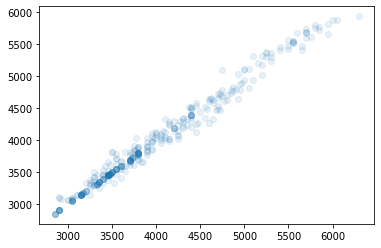

In [29]:
# 예측 결과 시각화
plt.scatter(y_train, y_train_pred, alpha=0.1)

In [25]:
# 정확도 확인

from sklearn.metrics import r2_score

r2_train = r2_score(y_train, y_train_pred)
print(f"# R2_train = {r2_train}")

# R2_train = 0.9840579175511219


In [26]:
# 머신러닝 예측 (2) 테스트 데이터

y_test_pred = rf.predict(X_test)

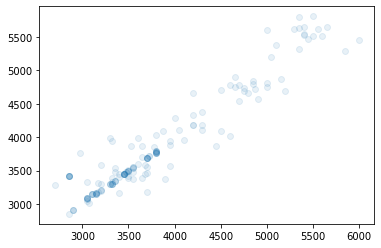

In [28]:
# 예측 결과 시각화
plt.scatter(y_test, y_test_pred, alpha=0.1)

In [34]:
# 정확도 확인

r2_test = r2_score(y_test, y_test_pred)
print(f"# R2_test = {r2_test}")

# R2_test = 0.9072447365464306


In [30]:
# 인자 중요도

fi = rf.feature_importances_
fi

array([0.04443348, 0.05681209, 0.12091753, 0.00100244, 0.0010536 ,
       0.57234172, 0.00484319, 0.00360984, 0.00201771, 0.0174767 ,
       0.1754917 ])

<BarContainer object of 11 artists>

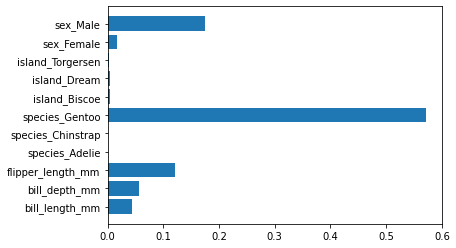

In [31]:
plt.barh(X_train.columns, fi)

In [32]:
# noise 섞기

X_train["noise"] = np.random.random(size=X_train.shape[0])
X_test["noise"] = np.random.random(size=X_test.shape[0])
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male,noise
207,43.2,18.5,192.0,1,0,0,0,1,0,0,1,0.823791
529,50.0,19.5,196.0,0,1,0,0,1,0,0,1,0.305151
328,36.4,17.0,195.0,1,0,0,0,1,0,1,0,0.307543
522,36.3,19.5,190.0,1,0,0,0,1,0,0,1,0.201323
58,50.5,15.9,225.0,0,0,1,1,0,0,0,1,0.265165


In [33]:
# 다시 머신러닝, 정확도, 인자 중요도 확인

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
r2_test_noise = r2_score(y_test, y_test_pred)
print(f"R2_test_noise = {r2_test_noise}")

R2_test_noise = 0.9072447365464306


<BarContainer object of 12 artists>

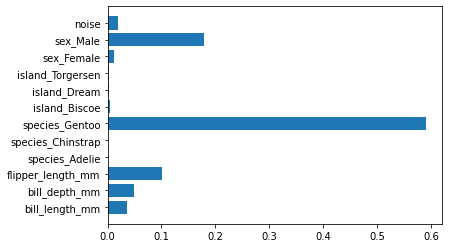

In [35]:
fi_noise = rf.feature_importances_
plt.barh(X_train.columns, fi_noise)

# Part II : Data Preprocessing

## Overview

In [36]:
# 데이터 훑어보기 1. 전체 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 544 non-null    int64  
 1   species            544 non-null    object 
 2   island             544 non-null    object 
 3   sex                528 non-null    object 
 4   bill_length_mm     542 non-null    float64
 5   bill_depth_mm      542 non-null    float64
 6   flipper_length_mm  542 non-null    float64
 7   body_mass_g        542 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.1+ KB


In [37]:
# 데이터 훑어보기 2. 데이터 값들

df.describe() # include="all"
df.describe(include="all")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,544.000000,544,544,528,542.000000,542.000000,542.000000,542.000000
unique,NaN,3,3,2,NaN,NaN,NaN,NaN
top,NaN,Adelie,Biscoe,Female,NaN,NaN,NaN,NaN
freq,NaN,352,213,345,NaN,NaN,NaN,NaN
mean,1525.648897,NaN,NaN,NaN,40.136642,17.109871,193.451661,3912.361624
std,283.905861,NaN,NaN,NaN,7.501267,2.628573,25.937679,769.220357
min,1000.000000,NaN,NaN,NaN,3.770000,1.370000,18.800000,2700.000000
25%,1284.000000,NaN,NaN,NaN,35.900000,16.100000,187.000000,3350.000000
50%,1520.000000,NaN,NaN,NaN,38.100000,17.500000,192.000000,3700.000000
75%,1795.000000,NaN,NaN,NaN,45.800000,18.600000,202.750000,4400.000000


## Cleansing

In [38]:
# 결측치 확인 1. 수
df.isnull().sum()

id                    0
species               0
island                0
sex                  16
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
dtype: int64

In [39]:
# 결측치 확인 2. 행

df.loc[df["body_mass_g"].isnull()]

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
130,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
470,1850,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [40]:
df.loc[df["sex"].isnull()]

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
6,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0
76,1120,Adelie,Dream,NaN,37.5,18.9,179.0,2975.0
94,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0
96,1452,Gentoo,Biscoe,NaN,44.5,14.3,216.0,4100.0
130,1035,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
203,1587,Gentoo,Biscoe,NaN,47.3,13.8,216.0,4725.0
280,1768,Adelie,Torgersen,NaN,37.8,17.3,180.0,3700.0
289,1379,Gentoo,Biscoe,NaN,46.2,14.4,214.0,4650.0
315,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0
325,1825,Adelie,Torgersen,NaN,34.1,18.1,193.0,3475.0


In [41]:
# 결측치 처리 1. 신체 데이터 결측 - 삭제
df.dropna(subset=["sex"], axis=0, inplace=True)
df

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1425,Adelie,Biscoe,Female,35.30,18.90,187.0,3800.0
1,1001,Gentoo,Biscoe,Male,50.10,15.00,225.0,5000.0
2,1420,Adelie,Dream,Female,36.60,18.40,184.0,3475.0
3,1795,Adelie,Torgersen,Female,36.60,17.80,185.0,3700.0
4,1212,Adelie,Torgersen,Male,4.18,1.94,19.8,4450.0
...,...,...,...,...,...,...,...,...
539,1689,Adelie,Dream,Female,36.20,17.30,187.0,3300.0
540,1115,Gentoo,Biscoe,Male,52.20,17.10,228.0,5400.0
541,1197,Gentoo,Biscoe,Female,43.50,15.20,213.0,4650.0
542,1829,Adelie,Torgersen,Female,38.90,17.80,181.0,3625.0


In [42]:
# 중복값 확인
df.duplicated(["id"]).sum()

195

In [43]:
df.loc[df.duplicated(["id"])].sort_values("id")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
295,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0
530,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0
327,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0
429,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0
352,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0
...,...,...,...,...,...,...,...,...
464,1985,Adelie,Dream,Female,36.0,17.1,187.0,3700.0
164,1985,Adelie,Dream,Female,36.0,17.1,187.0,3700.0
175,1985,Adelie,Dream,Female,36.0,17.1,187.0,3700.0
157,1985,Adelie,Dream,Female,36.0,17.1,187.0,3700.0


In [46]:
df.query("id == 1144")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
109,1144,Adelie,Dream,Female,36.9,18.6,189.0,3500.0


In [47]:
# 중복값 처리
df.drop_duplicates(["id"], inplace=True)
df.shape

(333, 8)

<AxesSubplot:xlabel='species', ylabel='count'>

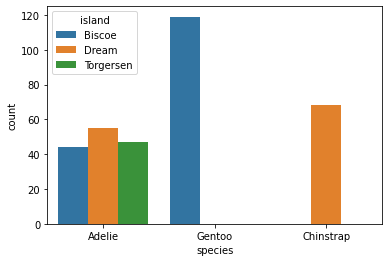

In [48]:
# 데이터 분포 확인 1. categorical features
sns.countplot(x=df["species"], hue=df["island"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

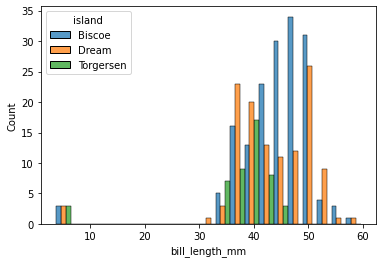

In [49]:
# 데이터 분포 확인 2. numerical features
sns.histplot(x=df["bill_length_mm"], hue=df["island"], multiple="dodge")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

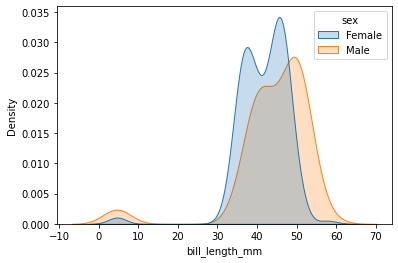

In [50]:
sns.kdeplot(x=df["bill_length_mm"], hue=df["sex"], fill=True)

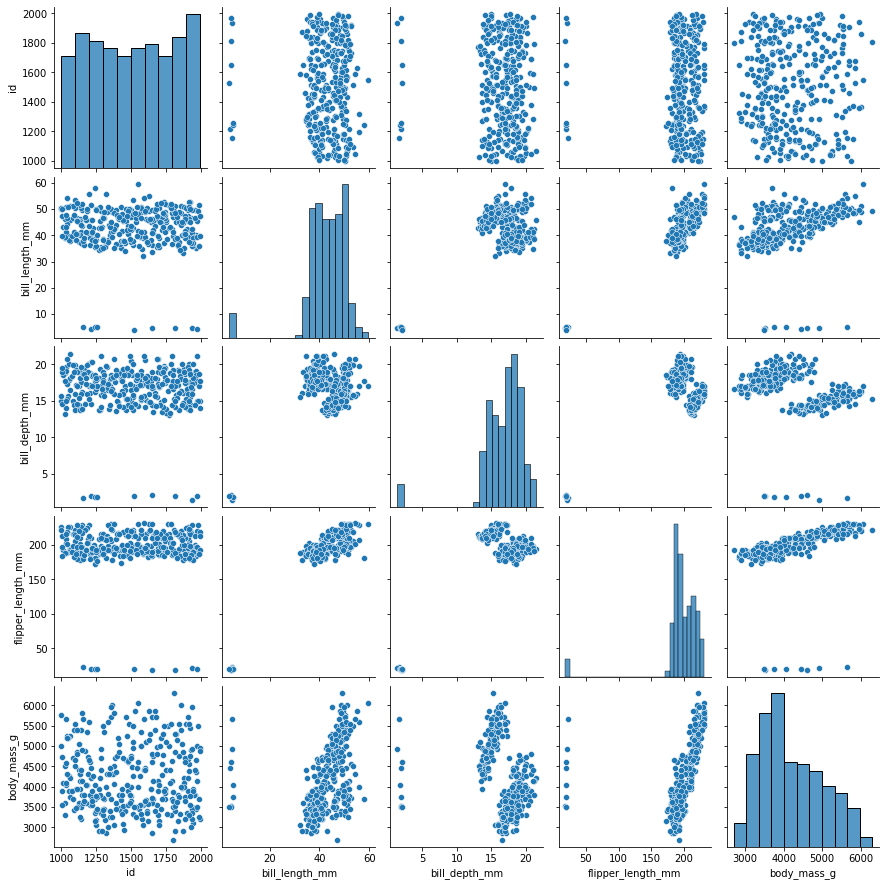

In [51]:
# 데이터 이상치 확인

sns.pairplot(df)

In [52]:
df.query("bill_depth_mm < 5")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
4,1212,Adelie,Torgersen,Male,4.18,1.94,19.8,4450.0
250,1152,Gentoo,Biscoe,Male,4.95,1.61,22.4,5650.0
323,1935,Gentoo,Biscoe,Female,4.72,1.37,21.4,4925.0
337,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0
364,1240,Chinstrap,Dream,Male,5.20,1.81,20.1,4050.0
393,1970,Adelie,Torgersen,Male,4.31,1.92,19.7,3500.0
436,1650,Adelie,Biscoe,Male,4.56,2.03,19.1,4600.0
460,1256,Chinstrap,Dream,Male,5.13,1.82,19.7,3750.0
483,1524,Adelie,Torgersen,Male,3.77,1.98,19.8,3500.0


In [53]:
df.query("body_mass_g == 3525.0")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
200,1440,Chinstrap,Dream,Female,45.60,19.40,194.0,3525.0
337,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0


In [54]:
df.query("(body_mass_g > 3500) & (body_mass_g < 3600)")

,id,species,island,sex,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
8,1584,Adelie,Biscoe,Female,39.00,17.50,186.0,3550.0
27,1688,Adelie,Dream,Female,35.70,18.00,202.0,3550.0
45,1204,Adelie,Torgersen,Female,36.20,16.10,187.0,3550.0
140,1570,Chinstrap,Dream,Male,50.90,19.10,196.0,3550.0
180,1922,Adelie,Dream,Female,42.20,18.50,180.0,3550.0
200,1440,Chinstrap,Dream,Female,45.60,19.40,194.0,3525.0
215,1479,Adelie,Biscoe,Male,40.60,18.60,183.0,3550.0
259,1622,Chinstrap,Dream,Female,45.90,17.10,190.0,3575.0
318,1567,Adelie,Torgersen,Female,39.60,17.20,196.0,3550.0
337,1812,Chinstrap,Dream,Female,4.54,1.87,18.8,3525.0


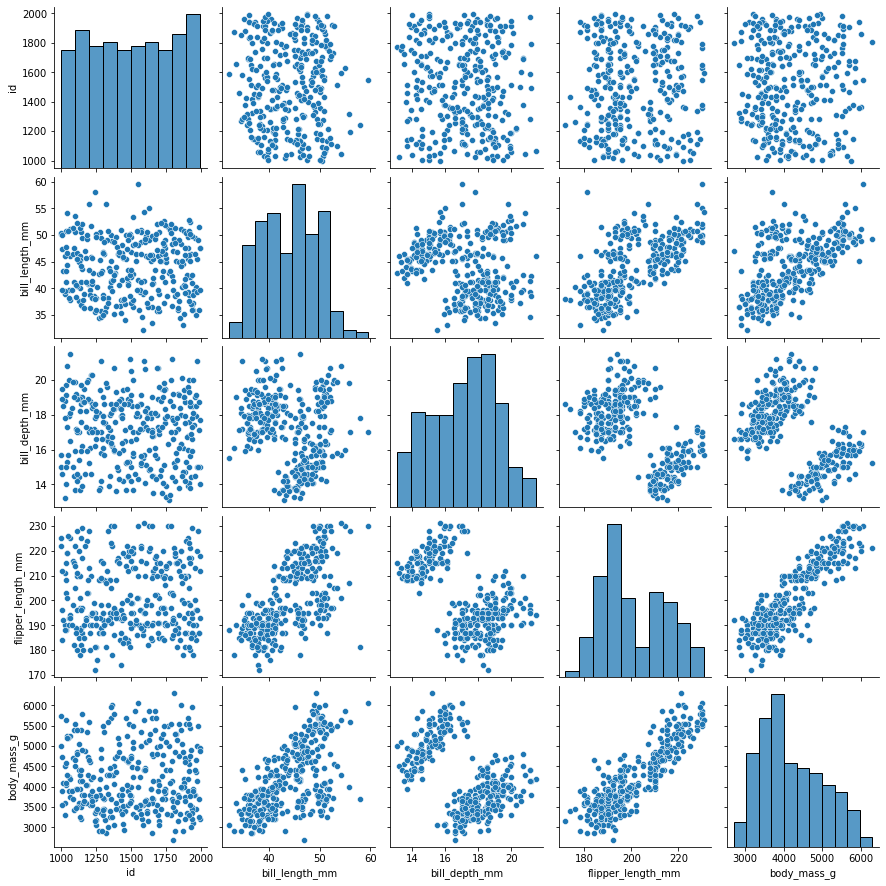

In [55]:
sns.pairplot(df.query("bill_depth_mm > 10"))

In [56]:
df = df.drop(index=df.query("bill_depth_mm < 10").index)

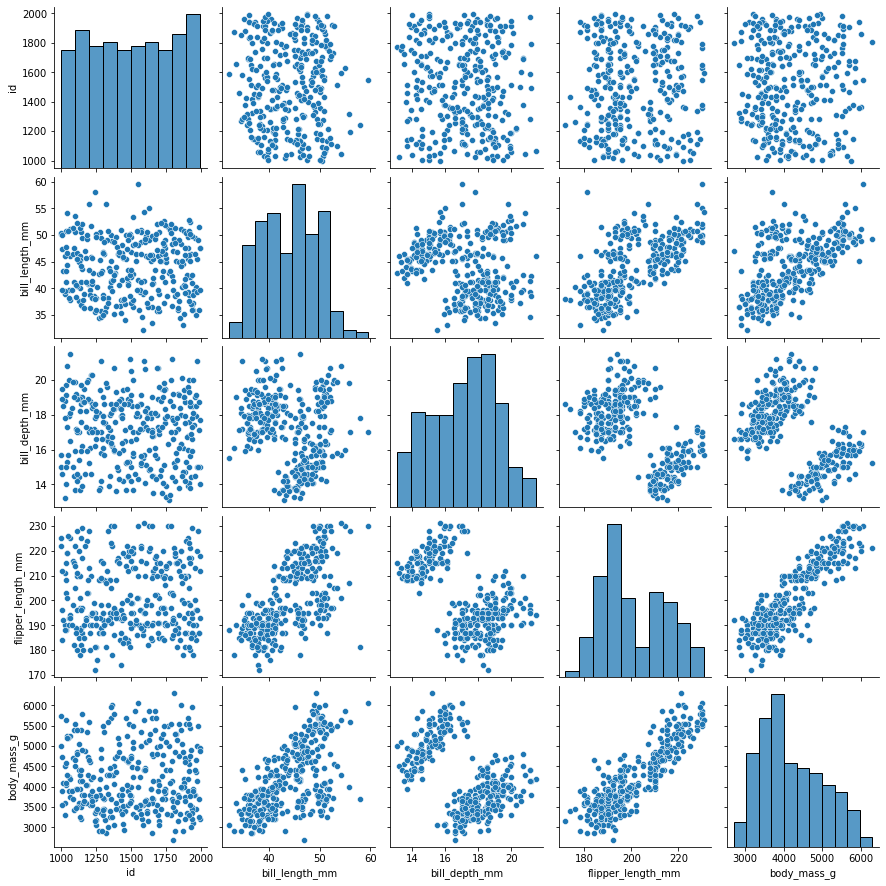

In [57]:
sns.pairplot(df)

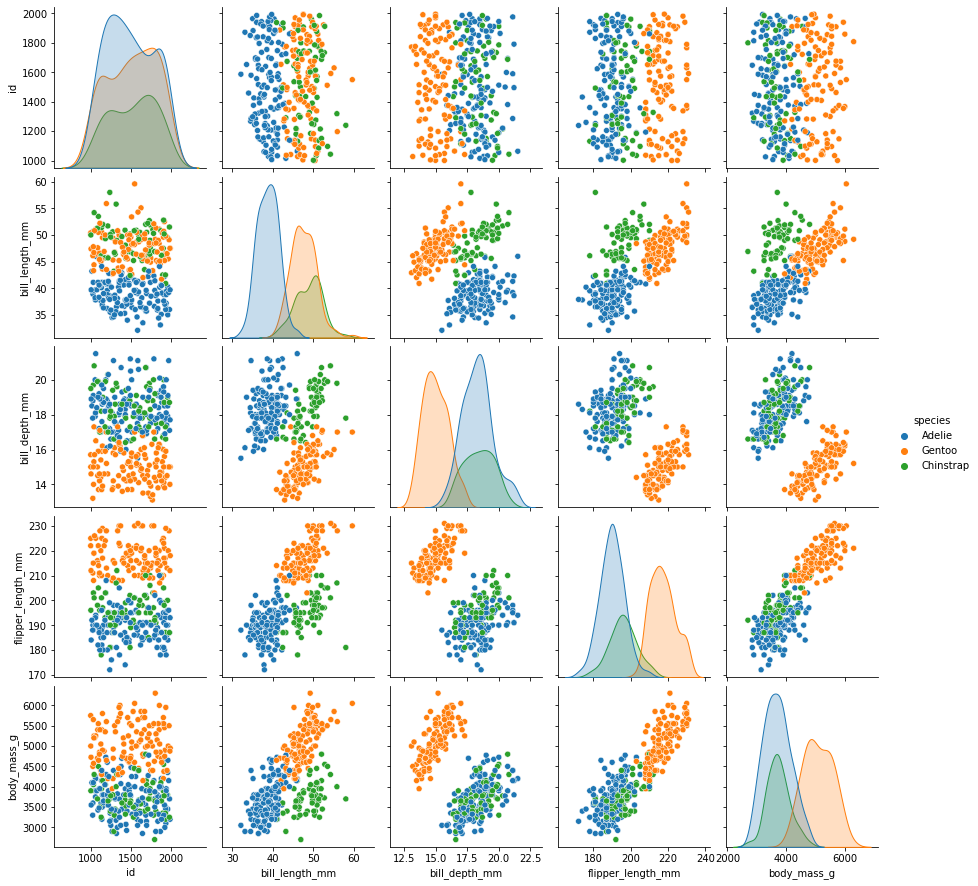

In [58]:
sns.pairplot(df, hue="species")

## Data Preparation

In [59]:
df.shape

(324, 8)

In [60]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "sex", "species", "island"]]
y = df["body_mass_g"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'testset')

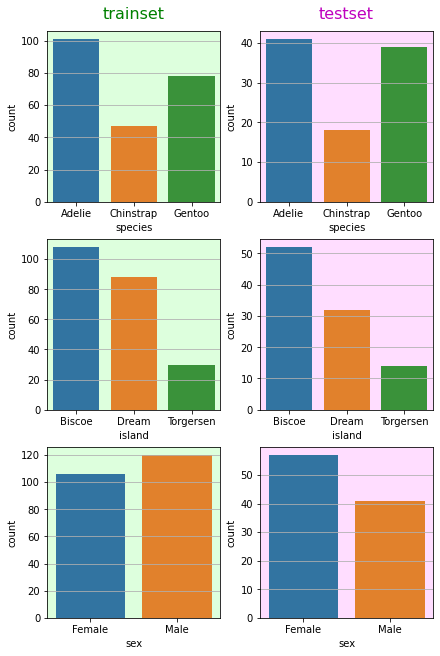

In [65]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")

axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

In [67]:
# stratified sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=X["species"])

Text(0.5, 1.0, 'testset')

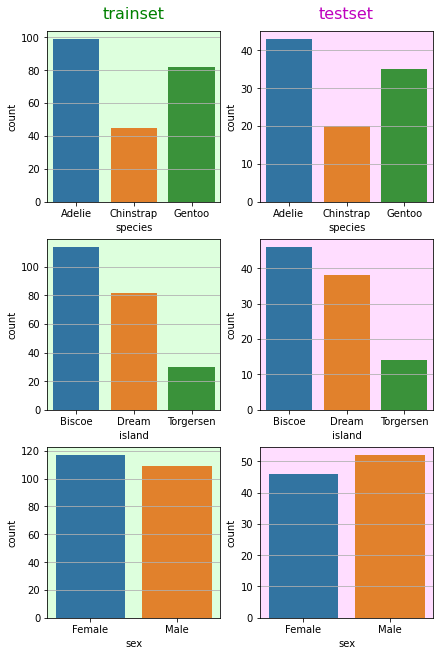

In [68]:
fig, axes = plt.subplots(ncols=2, nrows=3, 
                         figsize=(6,9), constrained_layout=True)

cols = ["species", "island", "sex"]

for ax, col in zip(axes[:, 0], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_train[col], order=order, ax=ax)
    ax.set_facecolor("#DDFFDD")
    ax.grid(axis="y")

for ax, col in zip(axes[:, 1], cols):
    order = np.sort(X[col].unique())
    sns.countplot(x=X_test[col], order=order, ax=ax)
    ax.set_facecolor("#FFDDFF")
    ax.grid(axis="y")
    
axes[0, 0].set_title("trainset", fontsize=16, color="g", pad=12)
axes[0, 1].set_title("testset", fontsize=16, color="m", pad=12)

## Machine Learning (1) get_dummies

In [69]:
X_train_1 = pd.get_dummies(X_train)
X_train_1.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex_Female,sex_Male,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen
527,51.5,18.7,187.0,0,1,0,1,0,0,1,0
501,41.3,20.3,194.0,0,1,1,0,0,0,1,0
258,34.4,18.4,184.0,1,0,1,0,0,0,0,1
346,51.3,19.9,198.0,0,1,0,1,0,0,1,0
312,37.3,16.8,192.0,1,0,1,0,0,0,1,0


In [70]:
rf = RandomForestRegressor()
rf.fit(X_train_1, y_train)

RandomForestRegressor()

In [71]:
y_train_pred = rf.predict(X_train_1)

X_test_1 = pd.get_dummies(X_test)
y_test_pred = rf.predict(X_test_1)

In [72]:
print(f"# R2_train = {r2_score(y_train, y_train_pred)}")
print(f"# R2_test = {r2_score(y_test, y_test_pred)}")

# R2_train = 0.9797092750447115
# R2_test = 0.8659081813576495


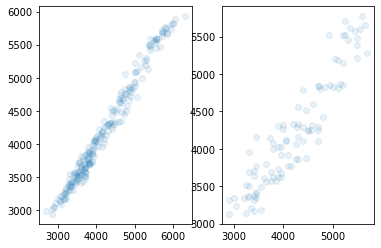

In [74]:
fig, axs = plt.subplots(ncols=2)

axs[0].scatter(y_train, y_train_pred, alpha=0.1)
axs[1].scatter(y_test, y_test_pred, alpha=0.1)

<BarContainer object of 11 artists>

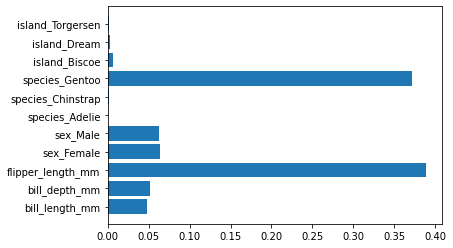

In [75]:
fi = rf.feature_importances_
plt.barh(X_train_1.columns, fi)